In [1]:
# Must have pandas, pymongo, and yfinace installed on environment
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
#API calls
#AstraZeneca
azn = yf.Ticker("AZN")
#Bristol Myers Squibb
bmy = yf.Ticker("BMY")
#Johnson & Johnson
jnj = yf.Ticker("JNJ")
#Merck
mrk = yf.Ticker("MRK")
#Pfizer
pfe = yf.Ticker("PFE")
aapl = yf.Ticker("AAPL")

In [3]:
mrk

yfinance.Ticker object <MRK>

In [4]:
#Extracting history data from stocks (parameters can change)
#Period parameters - 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
#Interval parameters - 1m, 2m, 5m, 15m, 30m, 1h, 1d, 5d, 1wk, 1mo, 3mo
azn_data = azn.history(interval="1d", period="10y")
bmy_data = bmy.history(interval="1d", period="10y")
jnj_data = jnj.history(interval="1d", period="10y")
mrk_data = mrk.history(interval="1d", period="10y")
pfe_data = pfe.history(interval="1d", period="10y")
aapl_data = aapl.history(interval="1d", period="10y")

In [5]:
aapl_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2011-03-14,10.864870,10.966389,10.807344,10.876560,435957200,0.0,0.0
2011-03-15,10.524016,10.700596,10.462490,10.626457,721081200,0.0,0.0
2011-03-16,10.520940,10.551703,10.036730,10.152091,1162011200,0.0,0.0
2011-03-17,10.361897,10.447418,10.172089,10.294526,659422400,0.0,0.0
2011-03-18,10.371123,10.404040,10.151783,10.172395,753214000,0.0,0.0
...,...,...,...,...,...,...,...
2021-03-08,120.930000,121.000000,116.209999,116.360001,153918600,0.0,0.0
2021-03-09,119.029999,122.059998,118.790001,121.089996,129159600,0.0,0.0
2021-03-10,121.690002,122.169998,119.449997,119.980003,111760400,0.0,0.0


In [7]:
#Converting to a DataFrame
azn_df = pd.DataFrame(azn_data)
bmy_df = pd.DataFrame(bmy_data)
jnj_df = pd.DataFrame(jnj_data)
mrk_df = pd.DataFrame(mrk_data)
pfe_df = pd.DataFrame(pfe_data)

In [8]:
#Inserting an identifier to know which stock the information came from
azn_df.insert(0, 'stock_name', 'AZN')
bmy_df.insert(0, 'stock_name', 'BMY')
jnj_df.insert(0, 'stock_name', 'JNJ')
mrk_df.insert(0, 'stock_name', 'MRK')
pfe_df.insert(0, 'stock_name', 'PFE')

In [9]:
#Add DataFrames to a list
dataframes = [azn_df, bmy_df, jnj_df, mrk_df, pfe_df]
#Concatinate this list into one DataFrame
stock_df = pd.concat(dataframes)
stock_df = pd.DataFrame(aapl_data)

In [10]:
stock_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2011-03-14,10.864870,10.966389,10.807344,10.876560,435957200,0.0,0.0
2011-03-15,10.524016,10.700596,10.462490,10.626457,721081200,0.0,0.0
2011-03-16,10.520940,10.551703,10.036730,10.152091,1162011200,0.0,0.0
2011-03-17,10.361897,10.447418,10.172089,10.294526,659422400,0.0,0.0
2011-03-18,10.371123,10.404040,10.151783,10.172395,753214000,0.0,0.0
...,...,...,...,...,...,...,...
2021-03-08,120.930000,121.000000,116.209999,116.360001,153918600,0.0,0.0
2021-03-09,119.029999,122.059998,118.790001,121.089996,129159600,0.0,0.0
2021-03-10,121.690002,122.169998,119.449997,119.980003,111760400,0.0,0.0


In [11]:
#Reset index
stock_df.reset_index(inplace=True)

In [12]:
#Remove unnecessary columns
stock_df.drop(["Dividends", "Stock Splits"], axis=1, inplace=True)

In [13]:
stock_df.rename(columns={"Date":"date", 
                         "Open": "open", 
                         "High": "high",
                         "Low": "low",
                         "Close": "close", 
                         "Volume": "volume",}, inplace=True)

In [14]:
stock_df

,date,open,high,low,close,volume
0,2011-03-14,10.864870,10.966389,10.807344,10.876560,435957200
1,2011-03-15,10.524016,10.700596,10.462490,10.626457,721081200
2,2011-03-16,10.520940,10.551703,10.036730,10.152091,1162011200
3,2011-03-17,10.361897,10.447418,10.172089,10.294526,659422400
4,2011-03-18,10.371123,10.404040,10.151783,10.172395,753214000
...,...,...,...,...,...,...
2512,2021-03-08,120.930000,121.000000,116.209999,116.360001,153918600
2513,2021-03-09,119.029999,122.059998,118.790001,121.089996,129159600
2514,2021-03-10,121.690002,122.169998,119.449997,119.980003,111760400
2515,2021-03-11,122.540001,123.209999,121.260002,121.959999,102753600


In [15]:
stock_df['date'] = pd.to_datetime(stock_df['date'])

In [16]:
from pandas.plotting import lag_plot
import numpy as np
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [17]:
#azn_df = stock_df[stock_df['stock_name'] == 'AZN']
#azn_df = azn_df.set_index('date')
#azn_df

In [18]:
stock_df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [19]:
stock_df.shape

(2517, 6)

In [20]:
stock_df.corr()

,open,high,low,close,volume
open,1.000000,0.999851,0.999784,0.999645,-0.433311
high,0.999851,1.000000,0.999732,0.999810,-0.430663
low,0.999784,0.999732,1.000000,0.999816,-0.437936
close,0.999645,0.999810,0.999816,1.000000,-0.434587
volume,-0.433311,-0.430663,-0.437936,-0.434587,1.000000


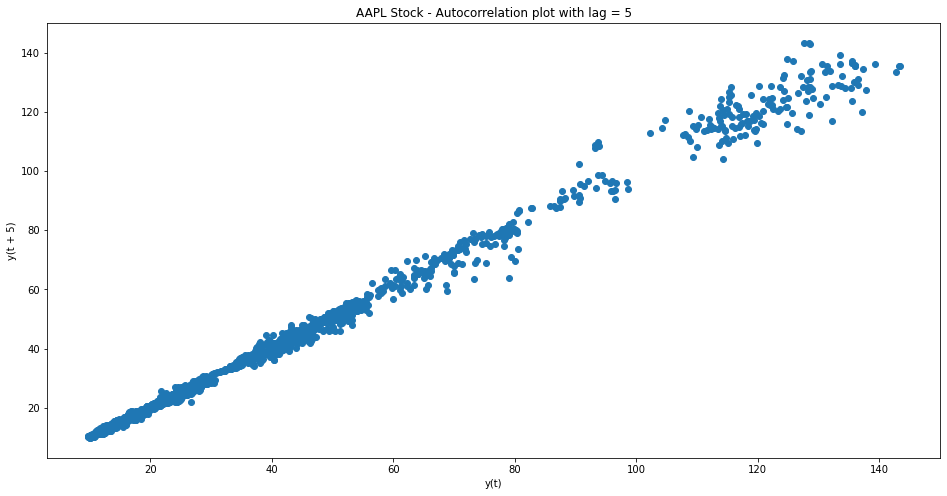

<Figure size 432x288 with 0 Axes>

In [21]:
plt.figure(figsize=(16,8))
lag_plot(stock_df['open'], lag=5)
plt.title('AAPL Stock - Autocorrelation plot with lag = 5')
plt.show()
plt.savefig('AAPL_autocorrelation.png')

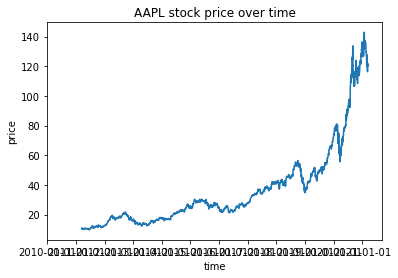

<Figure size 432x288 with 0 Axes>

In [65]:
plt.figure(figsize=(6,4))
plt.plot(stock_df["date"], stock_df["close"])
xticks = pd.date_range(datetime.datetime(2010,1,1), datetime.datetime(2021,1,1), freq='YS')
xticks=xticks.to_pydatetime()
plt.xticks(xticks)
plt.title("AAPL stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()
plt.savefig('AZN.png')

In [24]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(stock_df["close"])
result

(1.6366406113205834,
 0.9979634420230615,
 27,
 2489,
 {'1%': -3.4329799947351503,
  '5%': -2.862701915447137,
  '10%': -2.5673885329713495},
 7023.71488134677)

In [26]:
stock_df['First Difference'] = stock_df['close'] - stock_df['close'].shift(1)
stock_df['Seasonal First Difference']=stock_df['close']-stock_df['close'].shift(23)

result = adfuller(stock_df['Seasonal First Difference'].dropna())
result

(-5.603362985193795,
 1.250126747499774e-06,
 25,
 2468,
 {'1%': -3.433002396474742,
  '5%': -2.862711807995448,
  '10%': -2.5673937999062226},
 7848.5921827451875)

In [27]:
stock_df.head(10)

,date,open,high,low,close,volume,First Difference,Seasonal First Difference
0,2011-03-14,10.864870,10.966389,10.807344,10.876560,435957200,NaN,NaN
1,2011-03-15,10.524016,10.700596,10.462490,10.626457,721081200,-0.250103,NaN
2,2011-03-16,10.520940,10.551703,10.036730,10.152091,1162011200,-0.474366,NaN
3,2011-03-17,10.361897,10.447418,10.172089,10.294526,659422400,0.142435,NaN
4,2011-03-18,10.371123,10.404040,10.151783,10.172395,753214000,-0.122131,NaN
5,2011-03-21,10.336054,10.451414,10.313596,10.437879,409402000,0.265484,NaN
6,2011-03-22,10.538167,10.540013,10.432957,10.496328,325922800,0.058450,NaN
7,2011-03-23,10.437262,10.466179,10.334821,10.434494,372996400,-0.061834,NaN
8,2011-03-24,10.516327,10.643994,10.424346,10.612308,404712000,0.177814,NaN
9,2011-03-25,10.707669,10.830413,10.675368,10.814417,448910000,0.202109,NaN


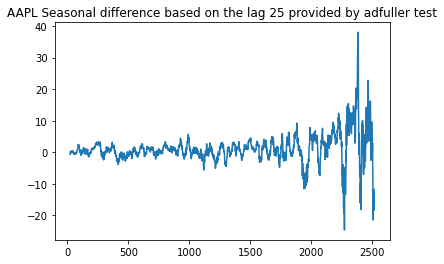

In [66]:
plt.figure(figsize=(6,4))
plt.title('AAPL Seasonal difference based on the lag 25 provided by adfuller test')
stock_df['Seasonal First Difference'].plot()
plt.savefig('AAPL_seasonal.png')

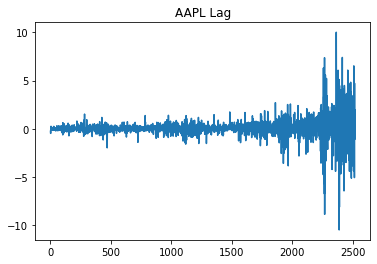

In [67]:
plt.figure(figsize=(6,4))
plt.title('AAPL Lag')
stock_df['First Difference'].plot()
plt.savefig("AAPL_lag.png")

<Figure size 432x288 with 0 Axes>

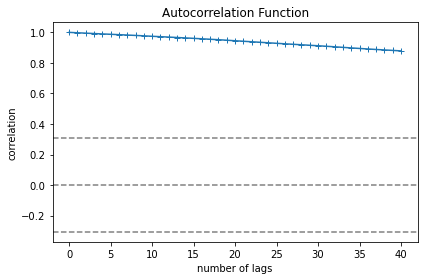

In [70]:
from statsmodels.tsa.stattools import acf, pacf
plt.figure(figsize=(6,4))
lag_acf = acf(stock_df['close'])
plt.figure(figsize=(6, 4))
plt.plot(lag_acf,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(lag_acf)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(lag_acf)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

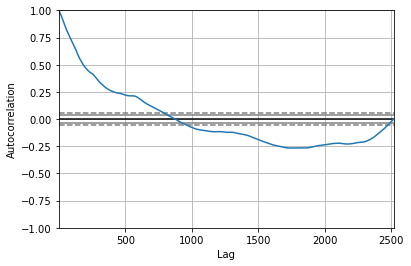

In [71]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(6,4))
autocorrelation_plot(stock_df['close'])
plt.show()

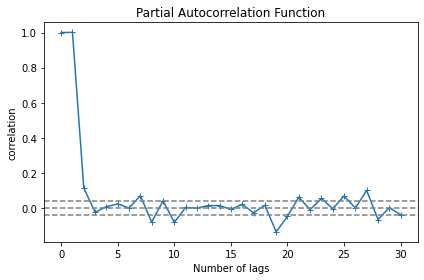

In [72]:
#calling partial correlation function
lag_pacf = pacf(stock_df['close'], nlags=30, method='ols')
#Plot PACF:
plt.figure(figsize=(6,4))
plt.plot(lag_pacf,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(stock_df['close'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(stock_df['close'])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.xlabel('Number of lags')
plt.ylabel('correlation')
plt.tight_layout()

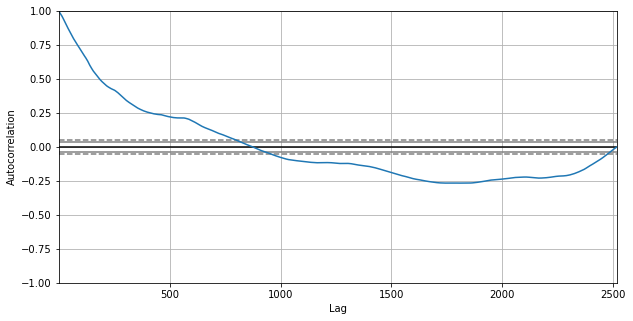

In [62]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(10,5))
autocorrelation_plot(stock_df['close'])
plt.show()

In [58]:
X_train, X_test = stock_df[0:int(len(stock_df)*0.8)], stock_df[int(len(stock_df)*0.8):]
X_train = X_train.set_index('date')
X_test = X_test.set_index('date')
X_test

,open,high,low,close,volume,First Difference,Seasonal First Difference
date,,,,,,,
2019-03-14,45.031931,45.080908,44.703803,44.990303,94318000,0.494637,3.261688
2019-03-15,45.264566,45.871847,44.992758,45.575550,156171600,0.585247,4.086910
2019-03-18,45.497201,46.131419,45.494750,46.040817,104879200,0.465267,4.194656
2019-03-19,46.121622,46.278339,45.526581,45.675953,126585600,-0.364864,4.003658
2019-03-20,45.602491,46.400776,45.235184,46.075096,124140800,0.399143,4.250977
...,...,...,...,...,...,...,...
2021-03-08,120.930000,121.000000,116.209999,116.360001,153918600,-5.059998,-18.428589
2021-03-09,119.029999,122.059998,118.790001,121.089996,129159600,4.729996,-12.650162
2021-03-10,121.690002,122.169998,119.449997,119.980003,111760400,-1.109993,-17.204994


<Figure size 864x576 with 0 Axes>

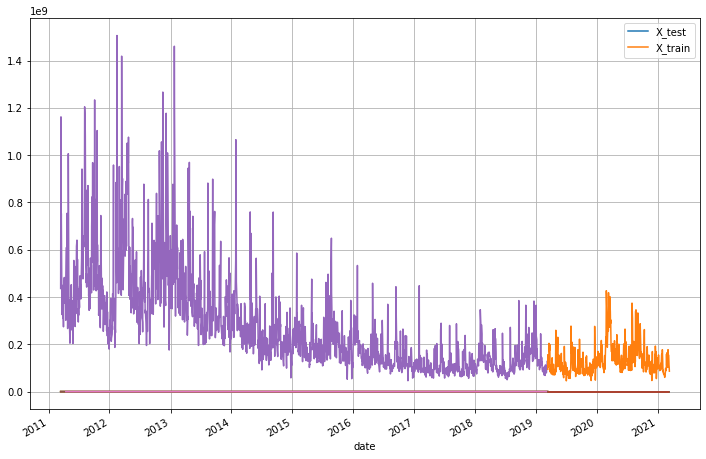

<Figure size 432x288 with 0 Axes>

In [59]:
plt.figure(figsize=(12,8))
ax=X_train.plot(grid=True, figsize=(12,8))
X_test.plot(ax=ax,grid=True)
plt.legend(['X_test', 'X_train'])
plt.show()
plt.savefig('AZN_TrainandTest.png')

In [60]:
#X_train, X_test = azn_df[0:int(len(azn_df)*0.8)], azn_df[int(len(azn_df)*0.8):]
training_data = X_train['close'].values
test_data = X_test['close'].values

In [73]:
import warnings
warnings.filterwarnings('ignore')
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat[0])
    true_test_value = test_data[time_point]
    history.append(true_test_value)
    #print(yhat, true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 4.402891149118598


In [42]:
model = ARIMA(history, order=(5,1,0))
model_fit = model.fit(disp=0)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 2516
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3589.968
Method:                       css-mle   S.D. of innovations              1.008
Date:                Fri, 12 Mar 2021   AIC                           7193.937
Time:                        19:40:02   BIC                           7234.750
Sample:                             1   HQIC                          7208.749
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0438      0.018      2.415      0.016       0.008       0.079
ar.L1.D.y     -0.1084      0.020     -5.438      0.000      -0.147      -0.069
ar.L2.D.y      0.0265      0.020      1.323      0.186      -0.013       0.066
ar.L3.D.y     -0.0077      0.020     -0.384      0.701      -0.047       0.032
ar.L4.D.y     -0.0209      0.020     -1.037      0.300      -0.060       0.019
ar.L5.D.y      0.0024      0.020      0.118      0.906      -0.037       0.042
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.9490           -1.4274j            2.4158           -0.3994
AR.2           -1.9490           +1.4274j            2.4158            0.3994
AR.3            1.7782           -2.1776j            2.8114           -0.1410
AR.4            1.7782           +2.1776j            2.8114            0.1410
AR.5            9.1276           -0.0000j            9.1276           -0.0000
-----------------------------------------------------------------------------
"""

In [43]:
test_date_range = X_test.index #azn_df[int(len(azn_df)*0.8):].index
test_date_range

DatetimeIndex(['2019-03-14', '2019-03-15', '2019-03-18', '2019-03-19',
               '2019-03-20', '2019-03-21', '2019-03-22', '2019-03-25',
               '2019-03-26', '2019-03-27',
               ...
               '2021-03-01', '2021-03-02', '2021-03-03', '2021-03-04',
               '2021-03-05', '2021-03-08', '2021-03-09', '2021-03-10',
               '2021-03-11', '2021-03-12'],
              dtype='datetime64[ns]', name='date', length=504, freq=None)

In [44]:
test_data = X_test['close'].values
test_data = test_data.tolist()

In [45]:
#plt.figure(figsize=(18,10))
#plt.plot(test_date_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
#plt.plot(test_date_range, test_data, color='red', label='Actual Price')
#plt.xticks(xticks)
#plt.title('AZN Prices Prediction')
#plt.xlabel('Date')
#plt.ylabel('Prices')
#plt.xticks(np.arange(0,504,50), test_date_range[0:504:50])
#plt.legend()
#plt.show()
plot_df =  pd.DataFrame({'date': test_date_range,
                        'prediction': model_predictions,
                        'Actual': test_data})
import plotly.express as go
fig = go.line(plot_df,x='date',y=['prediction','Actual'])
fig.show()